
#RESEARCH QUESTION

The research question I will be analyzing is: What factors contribute most to customer churn? Understanding the drivers of customer churn is critical for an organization, as it directly impacts profitability and long-term success. By identifying the key variables that contribute to churn, the company can gain valuable insights into why customers leave and develop targeted retention strategies to address these issues. This analysis offers significant benefits, including cost savings by reducing the need for extensive marketing efforts to acquire new customers, and gaining a competitive advantage through data-driven decision-making. The company can enhance customer satisfaction and loyalty by focusing on areas such as service quality, pricing, and customer support, ultimately reducing churn rates. Logistic regression will be used to estimate the probability of customer churn based on various factors, helping the company to prioritize actions that will most effectively mitigate churn and improve retention. This approach not only strengthens customer relationships but also positions the company as a leader in customer loyalty, driving long-term business success.



#GOALS

The primary goal of this analysis is to identify and understand the key variables within the churn dataset that can accurately predict when a customer is likely to churn. By analyzing these variables, we aim to uncover patterns and insights that indicate a higher probability of customer churn. This understanding will enable the organization to proactively address the factors that contribute to churn, thereby enhancing customer retention efforts. The dataset is particularly well-suited for this analysis due to the breadth and depth of predictor variables it contains. These variables span various aspects of customer behavior, demographics, service usage, and interactions with the company, all of which are critical in developing a comprehensive understanding of churn dynamics. The ultimate objective of the analysis is to build a robust predictive model that can be used to forecast churn risk, allowing the organization to implement targeted interventions and strategies to reduce churn rates and improve overall customer satisfaction and loyalty.



#SUMMARY OF ASSUMPTIONS

1. **Binary Outcome Variable:** The most fundamental assumption of logistic regression is that the response variable must be binary, meaning it should have only two possible outcomes. In our analysis, the response variable is "churn," which meets this requirement as it has two possible outcomes: "yes" (indicating that the customer has churned) and "no" (indicating that the customer has not churned). This binary nature of the outcome variable allows logistic regression to estimate the probability of a particular outcome occurring based on the predictor variables.

2. **Independence of Observations:** Another critical assumption is that the observations in the dataset must be independent of each other. This means that the occurrence of one event should not influence or be related to the occurrence of another. In the context of our analysis, we must ensure that each customer's data point is independent of others. To verify this, we will examine the residuals during the model evaluation phase. A residual plot can be used to check for random patterns, which would indicate that the independence assumption is being met.

3. *No Multicollinearity:** Logistic regression assumes that the predictor variables (independent variables) are not highly correlated with each other. Multicollinearity occurs when two or more explanatory variables are strongly correlated, which can distort the model's estimates and make it difficult to determine the individual effect of each predictor on the outcome. To assess multicollinearity in our analysis, we will use the Variance Inflation Factor (VIF). VIF values above a certain threshold suggest multicollinearity, and in such cases, we may need to remove or combine variables to ensure the model's assumptions are not violated.

4. **Linearity of Independent Variables and Log Odds:** Logistic regression assumes a linear relationship between the independent variables and the log odds of the outcome. This means that each predictor should have a linear association with the log odds of the dependent variable (churn). To satisfy this assumption, we will check the relationship between each independent variable and the log odds during the model development process. If necessary, transformations or interaction terms may be introduced to better meet this assumption.

In addition to these primary assumptions, it is also important to ensure that the sample size is sufficiently large, particularly when using multiple predictors in the model. A larger sample size provides more reliable estimates and reduces the risk of overfitting. For this analysis, we will use a substantial number of observations to support the inclusion of multiple predictors, ensuring the model's robustness and accuracy.



#TOOL BENEFITS

I chose to use Python for this analysis because of its robust capabilities in handling data analysis, its extensive library ecosystem, and its ease of use, which make it an ideal tool for every phase of the analysis process. Python's versatility allows it to manage tasks ranging from data cleaning and manipulation to complex statistical modeling and visualization, ensuring a seamless workflow.

1. Comprehensive Data Manipulation and Analysis:

Python offers powerful libraries like Pandas and NumPy that make data manipulation and analysis both efficient and intuitive. Pandas is particularly useful for handling large datasets, enabling easy data wrangling, transformation, and exploration with its DataFrame structure. It simplifies the process of filtering, aggregating, and restructuring data, which is essential for preparing the dataset for analysis. NumPy complements Pandas by providing efficient support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays. This combination allows for smooth and efficient manipulation of data, which is crucial for setting up the data in a format that is suitable for logistic regression and other statistical analyses.

2. Advanced Visualization and Statistical Modeling:

Python excels in data visualization and statistical modeling through libraries such as Matplotlib and Seaborn, which make it easy to create a wide range of visualizations, from simple plots to complex graphs. These tools are invaluable for exploring data distributions, identifying patterns, and presenting results in a clear and accessible manner. For statistical modeling, SciPy and Scikit-learn are indispensable. SciPy offers a vast array of statistical functions and is particularly useful for conducting hypothesis tests, checking for multicollinearity, and performing other essential statistical calculations. Scikit-learn is a powerful machine learning library that not only provides tools for building models like logistic regression but also includes methods for evaluating model performance and ensuring robustness. Its features for cross-validation, feature selection, and model tuning enhance the reliability and accuracy of the analysis, making Python a comprehensive tool for the entire analytical process.


In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/My Drive/D208')

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Disabling warinings
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/drive/MyDrive/D208/churn_clean.csv', index_col=0)
df.head()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,...,172.455519,904.536110,5,5,5,3,4,4,3,4
2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,...,242.632554,800.982766,3,4,3,3,4,3,4,4
3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [ ]:
#rename columns to python casing.
col_head = {
    'CaseOrder': 'case_order',
    'Customer_id': 'customer_id',
    'Interaction': 'interaction',
    'UID': 'uid',
    'City': 'city',
    'State': 'state',
    'County': 'county',
    'Zip': 'zip',
    'Lat': 'lat',
    'Lng': 'lng',
    'Population': 'population',
    'Area': 'area',
    'TimeZone': 'timezone',
    'Job': 'job',
    'Children': 'children',
    'Age': 'age',
    'Education': 'education',
    'Employment': 'employment_type',
    'Income': 'income',
    'Marital': 'marital_type',
    'Gender': 'gender',
    'Churn': 'churn',
    'Outage_sec_perweek': 'outage_sec_perweek',
    'Email': 'email',
    'Contacts': 'contacts',
    'Yearly_equip_failure': 'yearly_equip_failure',
    'Techie': 'techie',
    'Contract': 'contract',
    'Port_modem': 'port_modem',
    'Tablet': 'tablet',
    'InternetService': 'internet_service',
    'Phone': 'phone',
    'Multiple': 'multiple_lines',
    'OnlineSecurity': 'online_security',
    'OnlineBackup': 'online_backup',
    'DeviceProtection': 'device_protection',
    'TechSupport': 'tech_support',
    'StreamingTV': 'streaming_tv',
    'StreamingMovies': 'streaming_movies',
    'PaperlessBilling': 'paperless_billing',
    'PaymentMethod': 'payment_method',
    'Tenure': 'tenure',
    'MonthlyCharge': 'monthly_charge',
    'Bandwidth_GB_Year': 'bandwidth_gb_year',
    'Item1': 'response_timeliness',
    'Item2': 'fix_timeliness',
    'Item3': 'replacement_timeliness',
    'Item4': 'service_reliability',
    'Item5': 'service_options',
    'Item6': 'respectful_communication',
    'Item7': 'courteous_interaction',
    'Item8': 'active_listening_skill'}

df.rename(columns=col_head, inplace=True)

#Reexpressing the values of payment method to be more concise.
dict_pay = {"payment_method": {
     "Credit Card (automatic)": "Autopay",
     "Bank Transfer(automatic)": "Autopay",
     "Electronic Check": "eCheck",
     "Mailed Check": "Check",
}}
df.replace(dict_pay, inplace = True)

# dropping columns not relevant to analysis
df = df.drop(columns=['customer_id', 'interaction', 'uid',
                      'city', 'state', 'county', 'timezone',
                      'job','zip', 'lat', 'lng','population'])

In [ ]:
df.head()

,area,children,age,income,marital_type,gender,churn,outage_sec_perweek,email,contacts,...,monthly_charge,bandwidth_gb_year,response_timeliness,fix_timeliness,replacement_timeliness,service_reliability,service_options,respectful_communication,courteous_interaction,active_listening_skill
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,Urban,0,68,28561.99,Widowed,Male,No,7.978323,10,0,...,172.455519,904.536110,5,5,5,3,4,4,3,4
2,Urban,1,27,21704.77,Married,Female,Yes,11.699080,12,0,...,242.632554,800.982766,3,4,3,3,4,3,4,4
3,Urban,4,50,9609.57,Widowed,Female,No,10.752800,9,0,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
4,Suburban,1,48,18925.23,Married,Male,No,14.913540,15,2,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
5,Suburban,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [ ]:
#The 'internet_service' column does not contain null or missing values instead "None" is interpreted as a null value. To fix this we change "None" to "N/A"
for col in ['internet_service']:
    df[col].fillna('N/A', inplace=True)
    print(df[col].value_counts())

internet_service
Fiber Optic    4408
DSL            3463
N/A            2129
Name: count, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   area                      10000 non-null  object 
 1   children                  10000 non-null  int64  
 2   age                       10000 non-null  int64  
 3   income                    10000 non-null  float64
 4   marital_type              10000 non-null  object 
 5   gender                    10000 non-null  object 
 6   churn                     10000 non-null  object 
 7   outage_sec_perweek        10000 non-null  float64
 8   email                     10000 non-null  int64  
 9   contacts                  10000 non-null  int64  
 10  yearly_equip_failure      10000 non-null  int64  
 11  techie                    10000 non-null  object 
 12  contract                  10000 non-null  object 
 13  port_modem                10000 non-null  object 
 14  tablet     

In [ ]:
df.drop(columns=['area', 'children', 'age', 'income', 'marital_type', 'gender', 'outage_sec_perweek', 'contacts',
       'yearly_equip_failure', 'payment_method', 'tenure', 'monthly_charge', 'bandwidth_gb_year',
       'response_timeliness',	'fix_timeliness', 'replacement_timeliness', 'service_reliability',
       'service_options', 'respectful_communication', 'courteous_interaction', 'active_listening_skill'], axis =1, inplace=True)

In [ ]:
#Creating categorical column
cat_col = df.select_dtypes(exclude = ['int', 'float'])

#Creating numerical column
num_col = df.select_dtypes(exclude = ['object'])

In [ ]:
print(num_col.columns)
print("-" * 50)
cat_col.columns

Index(['email'], dtype='object')
--------------------------------------------------


Index(['churn', 'techie', 'contract', 'port_modem', 'tablet',
       'internet_service', 'phone', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing'],
      dtype='object')

In [ ]:
cat_col.describe()

,churn,techie,contract,port_modem,tablet,internet_service,phone,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,2,2,3,2,2,3,2,2,2,2,2,2,2,2,2
top,No,No,Month-to-month,No,No,Fiber Optic,Yes,No,No,No,No,No,No,No,Yes
freq,7350,8321,5456,5166,7009,4408,9067,5392,6424,5494,5614,6250,5071,5110,5882



#SUMMARY STATISTICS

**Dependent Variable:**

1. Churn:

- Description: The target variable indicating whether a customer has churned or not. It is binary, with two possible outcomes: "Yes" (1) if the customer has churned, and "No" (0) if the customer has not churned.

- Summary Statistics:
  
 - The mean value indicates the proportion of customers who have churned. For instance, a mean of 0.26 suggests that 26% of customers in the dataset have churned.

 - The count gives the total number of observations, providing a baseline for further analysis.

**Independent Variables:**

1. **Techie:**

 - Description: A binary variable indicating whether the customer considers themselves tech-savvy. This variable is represented as 1 for "Yes" and 0 for "No."

- Summary Statistics:

 - The mean value shows the proportion of tech-savvy customers.

 - The distribution helps to understand the role of tech-savviness in customer churn.

2. Port Modem:

- Description: A binary variable representing whether the customer has a portable modem. It is coded as 1 for "Yes" and 0 for "No."

- Summary Statistics:

 - Summary statistics show the percentage of customers using portable modems, which can be analyzed in relation to churn.

3. **Tablet:**

- Description: A binary variable indicating whether the customer owns a tablet. It is also coded as 1 for "Yes" and 0 for "No."

- Summary Statistics:

 - Provides insight into how tablet ownership correlates with churn.

4. **Phone:**

- Description: A binary variable that shows whether the customer uses a phone service from the company.

- Summary Statistics:

 - Understanding the distribution of phone service usage among customers can reveal its impact on churn.

5. **Multiple Lines:**

- Description: Indicates whether the customer has multiple lines, coded as 1 for "Yes" and 0 for "No."

- Summary Statistics:

 - The proportion of customers with multiple lines can be related to their likelihood of churning.

6. **Online Security:**

- Description: A binary variable indicating whether the customer subscribes to online security services.

- Summary Statistics:

 - The distribution of this variable helps to understand its protective effect against churn.

7. *Online Backup**:

- Description: Indicates whether the customer subscribes to online backup services.

- Summary Statistics:
 - The impact of online backup services on customer retention can be analyzed.

8. **Device Protection**:

- Description: A binary variable showing whether the customer has device protection services.

- Summary Statistics:

 - The percentage of customers with device protection services can be assessed for its role in reducing churn.

9. **Tech Support**:

- Description: A binary variable indicating whether the customer subscribes to tech support services.

- Summary Statistics:

 - Analyzing the proportion of customers using tech support can provide insights into its effect on churn.

10. **Streaming TV**:

- Description: Indicates whether the customer subscribes to a streaming TV service.

- Summary Statistics:

 - Helps to understand if streaming TV services contribute to customer loyalty.

11. **Streaming Movies**:

- Description: A binary variable that shows whether the customer subscribes to streaming movies services.

- Summary Statistics:

 - The role of streaming services in reducing churn can be assessed.

12. **Paperless Billing**:

- Description: Indicates whether the customer uses paperless billing.

- Summary Statistics:

 - The adoption of paperless billing might influence customer retention.

13. **Email**:

- Description: The number of email contacts between the customer and the company.

- Summary Statistics:
 - Analyzing the mean and distribution of emails can indicate how customer interaction through email impacts churn.

14. Internet Service (DSL, Fiber Optic):

- Description: These are dummy variables indicating the type of internet service the customer subscribes to, with possible values like DSL or Fiber Optic.

- Summary Statistics:

 - Understanding the type of internet service and its impact on churn can guide product offerings.

15. Contract (One Year, Two Year):

- Description: Dummy variables representing the type of contract the customer has, either a one-year or two-year contract.

- Summary Statistics:

 - Contract types can significantly influence churn, with longer contracts typically reducing churn.


In [ ]:
num_col.describe()

,email
count,10000.000000
mean,12.016000
std,3.025898
min,1.000000
25%,10.000000
50%,12.000000
75%,14.000000
max,23.000000


In [ ]:
#sumamries for each variable
for column in df.columns:
    most_frequent = df[column].mode().values[0]
    frequency = df[column].value_counts()[most_frequent]
    unique_values = df[column].unique()

    print(f"Column '{column}':")
    print(f"  Value: '{most_frequent}' - {frequency} times")
    print(f"  Unique values: {unique_values}\n")

Column 'churn':
  Value: 'No' - 7350 times
  Unique values: ['No' 'Yes']

Column 'email':
  Value: '12' - 1310 times
  Unique values: [10 12  9 15 16 20 18 17 14 13 11  8  6  5 19  3  7 21  4  2  1 23 22]

Column 'techie':
  Value: 'No' - 8321 times
  Unique values: ['No' 'Yes']

Column 'contract':
  Value: 'Month-to-month' - 5456 times
  Unique values: ['One year' 'Month-to-month' 'Two Year']

Column 'port_modem':
  Value: 'No' - 5166 times
  Unique values: ['Yes' 'No']

Column 'tablet':
  Value: 'No' - 7009 times
  Unique values: ['Yes' 'No']

Column 'internet_service':
  Value: 'Fiber Optic' - 4408 times
  Unique values: ['Fiber Optic' 'DSL' 'N/A']

Column 'phone':
  Value: 'Yes' - 9067 times
  Unique values: ['Yes' 'No']

Column 'multiple_lines':
  Value: 'No' - 5392 times
  Unique values: ['No' 'Yes']

Column 'online_security':
  Value: 'No' - 6424 times
  Unique values: ['Yes' 'No']

Column 'online_backup':
  Value: 'No' - 5494 times
  Unique values: ['Yes' 'No']

Column 'device_


#APPROPRIATE TECHNIQUE

Logistic regression is an appropriate technique for analyzing the research question of identifying factors that contribute most to customer churn because the dependent variable, "churn," is binary, with only two possible outcomes: "yes" (the customer churns) and "no" (the customer does not churn). This binary nature of the outcome variable makes logistic regression the ideal method, as it is specifically designed to model the probability of a binary response based on one or more predictor variables. Unlike multiple linear regression, which is suited for continuous outcome variables, logistic regression is tailored to situations where the response variable is categorical. In this case, predicting whether a customer will churn or not requires a method that can estimate probabilities and classify outcomes into one of two categories. Logistic regression provides these capabilities by modeling the log odds of the dependent variable as a linear combination of the independent variables. Additionally, logistic regression assumes that the independent variables are not highly correlated (i.e., no multicollinearity), which is crucial for obtaining reliable estimates of the coefficients. The technique also assumes that the relationship between the independent variables and the log odds of the dependent variable is linear. This makes logistic regression appropriate as long as these assumptions hold true. Furthermore, logistic regression is preferred over other techniques when the dependent variable is binary, as it provides meaningful and interpretable results, such as odds ratios, which help in understanding the influence of each predictor on the likelihood of churn. However, logistic regression would not be appropriate if the outcome variable were continuous, as in the case of predicting customer tenure, where a different method, like linear regression, would be more suitable. Similarly, logistic regression would be ineffective if there was significant multicollinearity among the independent variables or if the relationships between the predictors and the outcome were highly non-linear, requiring alternative modeling approaches. Logistic regression is well-suited to the analysis of customer churn because it effectively handles the binary nature of the dependent variable, allows for the inclusion of multiple predictors, and provides interpretable results that can inform targeted strategies to reduce churn.


In [ ]:
# Converting yes/no columns to 1/0
yes_no_col = ['churn', 'techie', 'port_modem', 'tablet', 'phone', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing']
df[yes_no_col] = df[yes_no_col].replace({'Yes': 1, 'No': 0})

In [ ]:
df = pd.get_dummies(df, columns=['internet_service','contract'])

In [ ]:
#internet_service_DSL, internet_service_Fiber Optic,	internet_service_N/A were created but we can drop the N/A column
df.drop(['internet_service_N/A'], axis=1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   churn                         10000 non-null  int64
 1   email                         10000 non-null  int64
 2   techie                        10000 non-null  int64
 3   port_modem                    10000 non-null  int64
 4   tablet                        10000 non-null  int64
 5   phone                         10000 non-null  int64
 6   multiple_lines                10000 non-null  int64
 7   online_security               10000 non-null  int64
 8   online_backup                 10000 non-null  int64
 9   device_protection             10000 non-null  int64
 10  tech_support                  10000 non-null  int64
 11  streaming_tv                  10000 non-null  int64
 12  streaming_movies              10000 non-null  int64
 13  paperless_billing             10000 

In [ ]:
df['email'].describe()

,email
count,10000.000000
mean,12.016000
std,3.025898
min,1.000000
25%,10.000000
50%,12.000000
75%,14.000000
max,23.000000


In [ ]:
#Turn True/False columns into 1/0
true_false_col = ['internet_service_DSL', 'internet_service_Fiber Optic', 'contract_Month-to-month', 'contract_One year', 'contract_Two Year']
df[true_false_col] = df[true_false_col].replace({True: 1, False: 0})

In [ ]:
mean_charge = df.groupby('churn')['email'].mean()
print(mean_charge)

churn
0    11.993605
1    12.078113
Name: email, dtype: float64


In [ ]:
df.describe()

,churn,email,techie,port_modem,tablet,phone,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,internet_service_DSL,internet_service_Fiber Optic,contract_Month-to-month,contract_One year,contract_Two Year
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.265000,12.016000,0.167900,0.483400,0.299100,0.906700,0.460800,0.357600,0.450600,0.438600,0.375000,0.492900,0.489000,0.588200,0.346300,0.440800,0.545600,0.210200,0.244200
std,0.441355,3.025898,0.373796,0.499749,0.457887,0.290867,0.498486,0.479317,0.497579,0.496241,0.484147,0.499975,0.499904,0.492184,0.475814,0.496508,0.497941,0.407471,0.429633
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,10.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,12.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.groupby('churn').mean()

,email,techie,port_modem,tablet,phone,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,internet_service_DSL,internet_service_Fiber Optic,contract_Month-to-month,contract_One year,contract_Two Year
churn,,,,,,,,,,,,,,,,,,
0,11.993605,0.152925,0.480952,0.299864,0.911293,0.421361,0.361497,0.435510,0.421769,0.369524,0.423810,0.402177,0.586122,0.319592,0.458231,0.465578,0.244218,0.290204
1,12.078113,0.209434,0.490189,0.296981,0.893962,0.570189,0.346792,0.492453,0.485283,0.390189,0.684528,0.729811,0.593962,0.420377,0.392453,0.767547,0.115849,0.116604


In [ ]:
df_churn_yes = df[df['churn'] == 1]
df_churn_yes.describe()

,churn,email,techie,port_modem,tablet,phone,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,internet_service_DSL,internet_service_Fiber Optic,contract_Month-to-month,contract_One year,contract_Two Year
count,2650.0,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000
mean,1.0,12.078113,0.209434,0.490189,0.296981,0.893962,0.570189,0.346792,0.492453,0.485283,0.390189,0.684528,0.729811,0.593962,0.420377,0.392453,0.767547,0.115849,0.116604
std,0.0,3.008534,0.406981,0.499998,0.457014,0.307944,0.495142,0.476039,0.500037,0.499878,0.487885,0.464791,0.444141,0.491184,0.493713,0.488389,0.422476,0.320104,0.321008
min,1.0,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,10.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1.0,12.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.0,14.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.0,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_churn_no = df[df['churn'] == 0]
df_churn_no.describe()

,churn,email,techie,port_modem,tablet,phone,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,internet_service_DSL,internet_service_Fiber Optic,contract_Month-to-month,contract_One year,contract_Two Year
count,7350.0,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000
mean,0.0,11.993605,0.152925,0.480952,0.299864,0.911293,0.421361,0.361497,0.435510,0.421769,0.369524,0.423810,0.402177,0.586122,0.319592,0.458231,0.465578,0.244218,0.290204
std,0.0,3.032026,0.359940,0.499671,0.458229,0.284340,0.493811,0.480467,0.495857,0.493876,0.482709,0.494195,0.490371,0.492561,0.466350,0.498286,0.498848,0.429652,0.453887
min,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,10.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,12.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,14.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,0.0,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.corr().abs().sort_values(by='churn', ascending=False)

,churn,email,techie,port_modem,tablet,phone,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,internet_service_DSL,internet_service_Fiber Optic,contract_Month-to-month,contract_One year,contract_Two Year
churn,1.000000,0.012326,0.066722,0.008157,0.002779,0.026297,0.131771,0.013540,0.050508,0.056489,0.018838,0.230151,0.289262,0.007030,0.093487,0.058472,0.267653,0.139043,0.178337
streaming_movies,0.289262,0.000711,0.004298,0.005674,0.020710,0.002588,0.004691,0.010575,0.001434,0.019450,0.013533,0.010516,1.000000,0.000692,0.000249,0.002211,0.007640,0.001904,0.007049
contract_Month-to-month,0.267653,0.007547,0.001041,0.008267,0.011795,0.011708,0.020599,0.014693,0.005056,0.001215,0.003734,0.019789,0.007640,0.006211,0.004817,0.005661,1.000000,0.565296,0.622856
streaming_tv,0.230151,0.005099,0.003436,0.000272,0.018233,0.012464,0.003097,0.001415,0.008043,0.002878,0.003047,1.000000,0.010516,0.016353,0.002979,0.005118,0.019789,0.022054,0.002020
contract_Two Year,0.178337,0.004072,0.006235,0.001648,0.003255,0.001471,0.009212,0.017357,0.004381,0.005658,0.003726,0.002020,0.007049,0.021101,0.002610,0.007298,0.622856,0.293243,1.000000
contract_One year,0.139043,0.013516,0.005302,0.011840,0.017845,0.012756,0.015460,0.000346,0.001559,0.007450,0.000634,0.022054,0.001904,0.014659,0.003135,0.014613,0.565296,1.000000,0.293243
multiple_lines,0.131771,0.002966,0.004661,0.003014,0.019828,0.003398,1.000000,0.002436,0.002566,0.003207,0.010360,0.003097,0.004691,0.004657,0.010225,0.009210,0.020599,0.015460,0.009212
internet_service_DSL,0.093487,0.001904,0.002565,0.003371,0.001018,0.000071,0.010225,0.000715,0.000181,0.009688,0.023172,0.002979,0.000249,0.017909,1.000000,0.646211,0.004817,0.003135,0.002610
techie,0.066722,0.014047,1.000000,0.014256,0.010992,0.003081,0.004661,0.015300,0.004540,0.021346,0.007391,0.003436,0.004298,0.001311,0.002565,0.002100,0.001041,0.005302,0.006235
internet_service_Fiber Optic,0.058472,0.002827,0.002100,0.003294,0.005469,0.008126,0.009210,0.014582,0.001925,0.006759,0.026211,0.005118,0.002211,0.017686,0.646211,1.000000,0.005661,0.014613,0.007298


In [ ]:
# Checking for multicollinearity
vif_df = pd.DataFrame()
vif_df['feature'] = df.columns

vif_df['VIF'] = [variance_inflation_factor(df.values, i)
                  for i in range(len(df.columns))]
vif_df.sort_values(by='VIF', ascending=False)

,feature,VIF
16,contract_Month-to-month,21.802024
18,contract_Two Year,10.491622
17,contract_One year,9.095361
14,internet_service_DSL,1.729994
15,internet_service_Fiber Optic,1.719815
0,churn,1.331214
12,streaming_movies,1.112368
11,streaming_tv,1.076983
6,multiple_lines,1.025824
2,techie,1.007219


In [ ]:
df.drop(['contract_Two Year','contract_Month-to-month'], axis = 1, inplace = True)

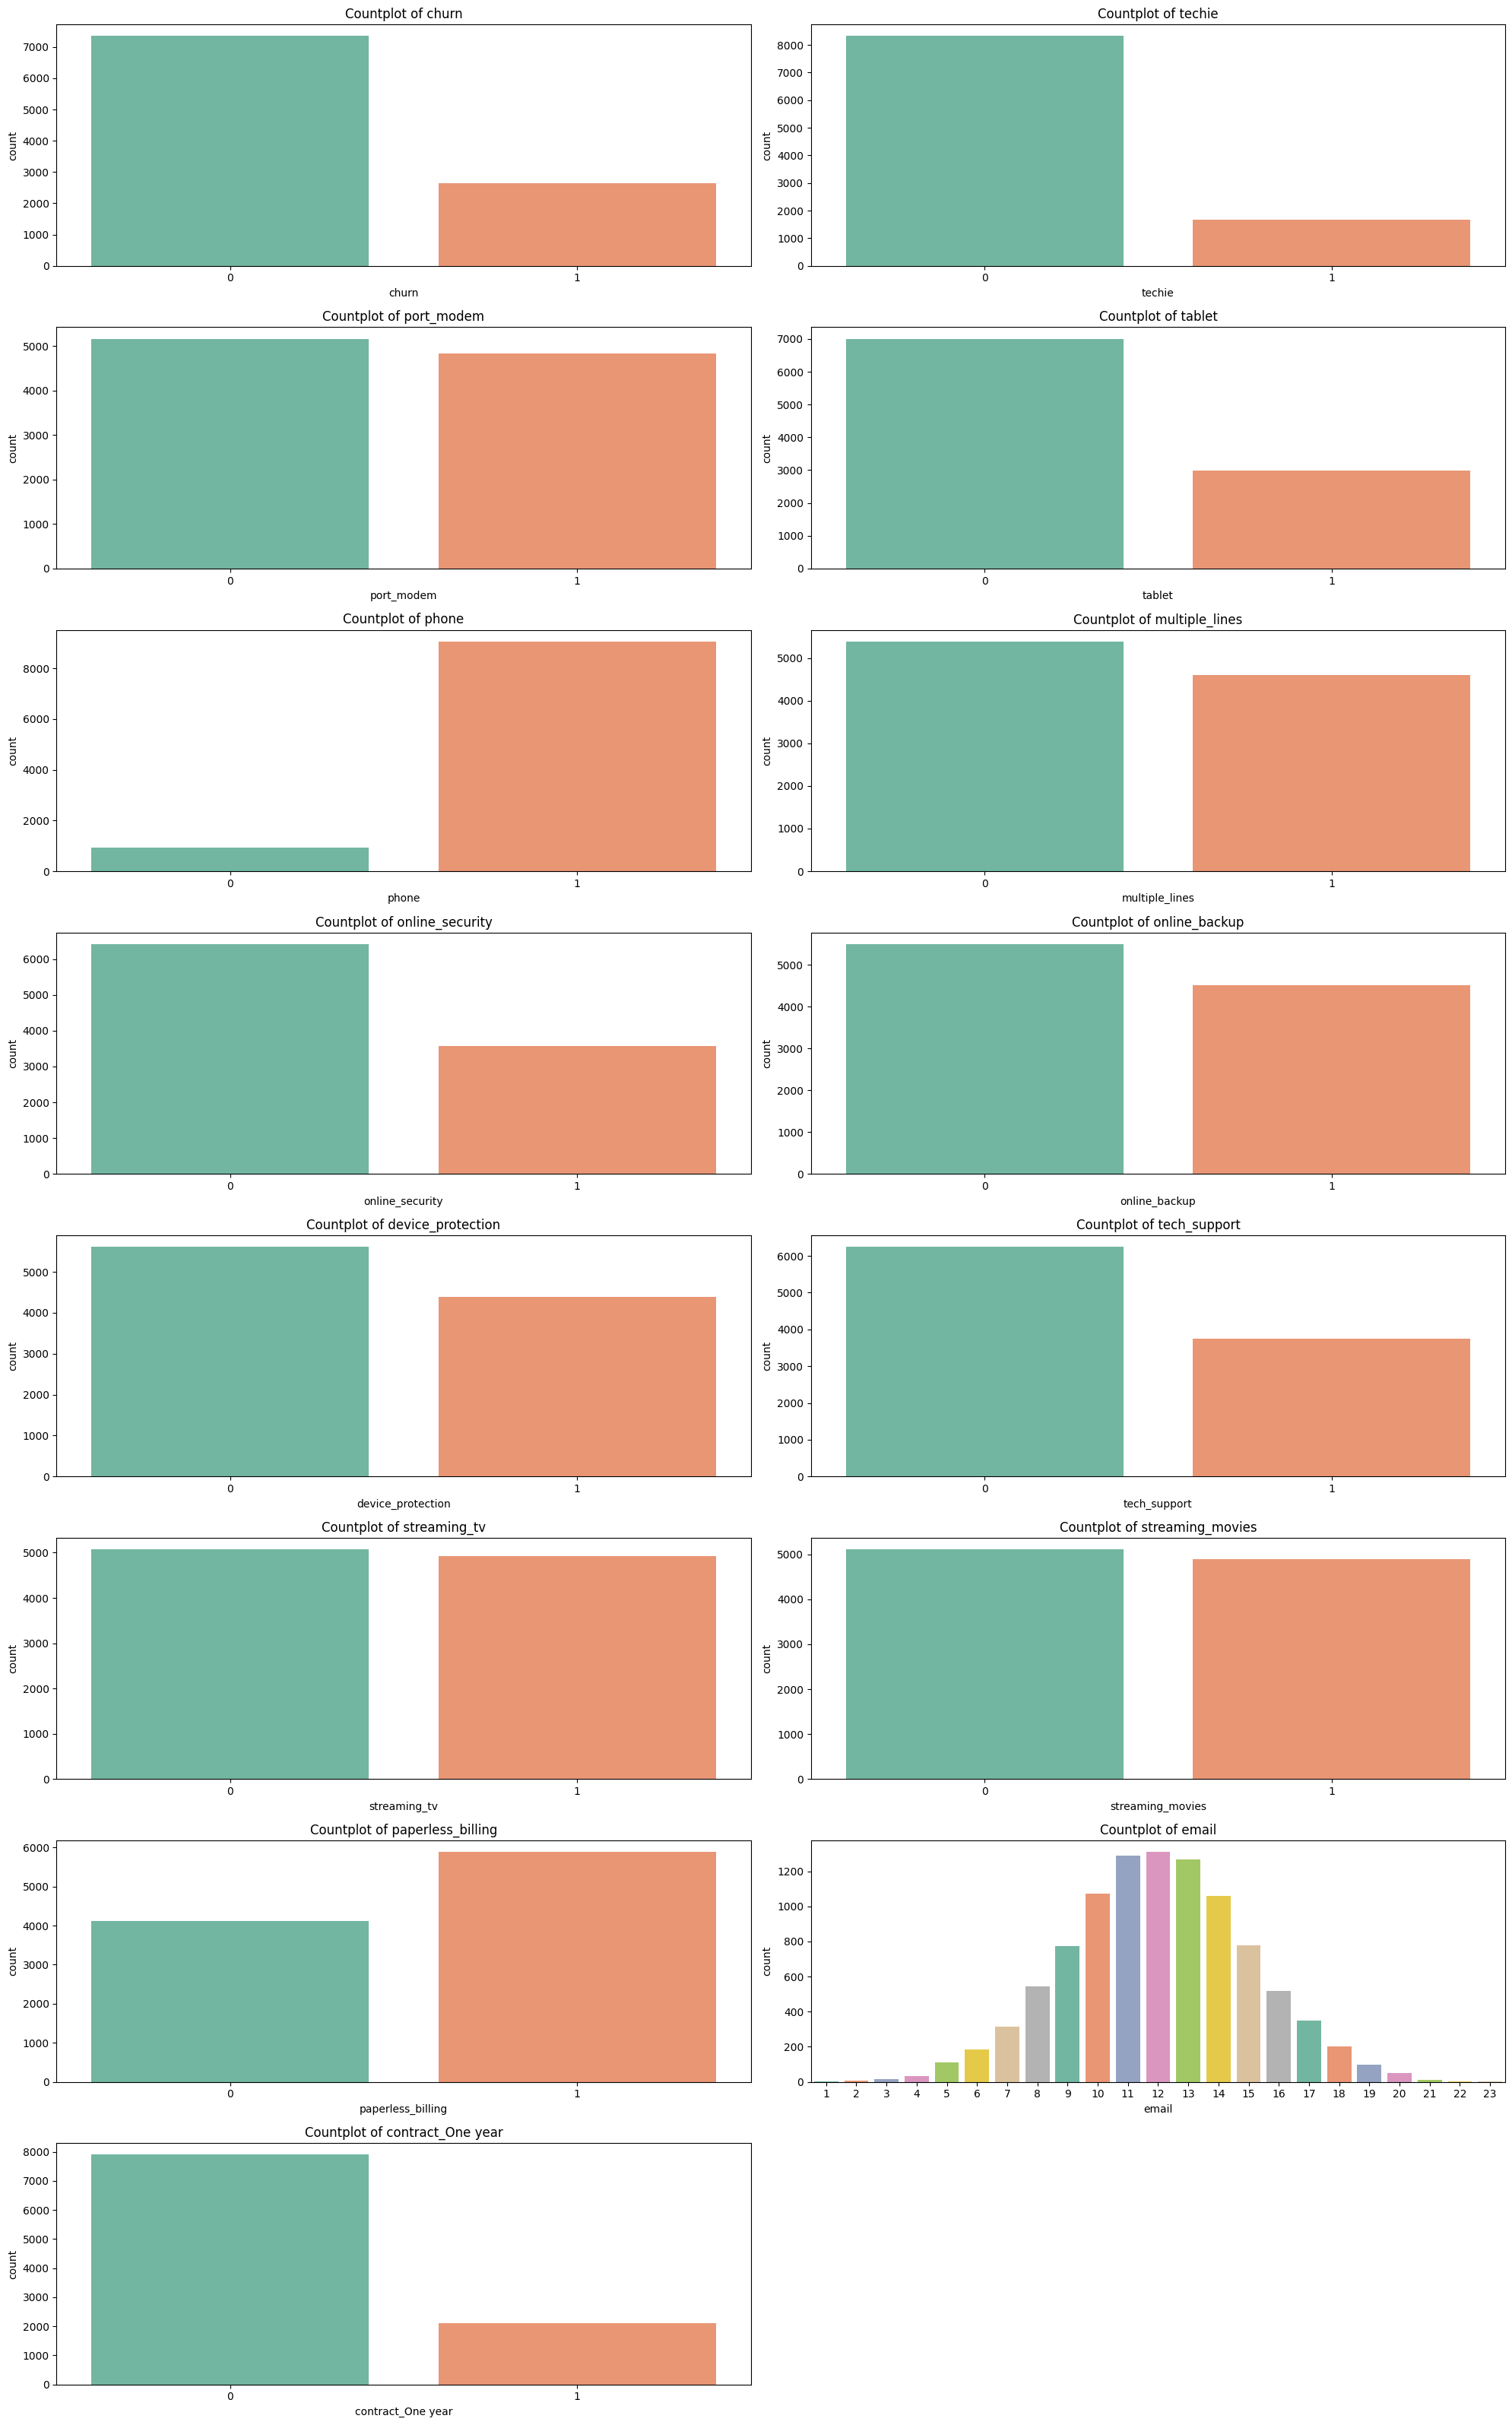

In [ ]:
# Univariate Visualizations

Univar = ['churn', 'techie', 'port_modem', 'tablet', 'phone', 'multiple_lines',
          'online_security', 'online_backup', 'device_protection', 'tech_support',
          'streaming_tv', 'streaming_movies', 'paperless_billing', 'email',
          'contract_One year']

# Calculate the number of rows needed for the subplot grid
num_vars = len(Univar)
num_cols = 2  # Number of columns in the grid
num_rows = (num_vars + num_cols - 1) // num_cols  # Calculate the number of rows

# Univariate histogram visualizations of categorical variables
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 4))

# Define a color palette
palette = sns.color_palette("Set2")

# Flatten axes array for easy iteration if needed
axes = axes.flatten()

for i, col in enumerate(Univar):
    sns.countplot(data=df, x=col, ax=axes[i], palette=palette)
    axes[i].set_title(f'Countplot of {col}')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


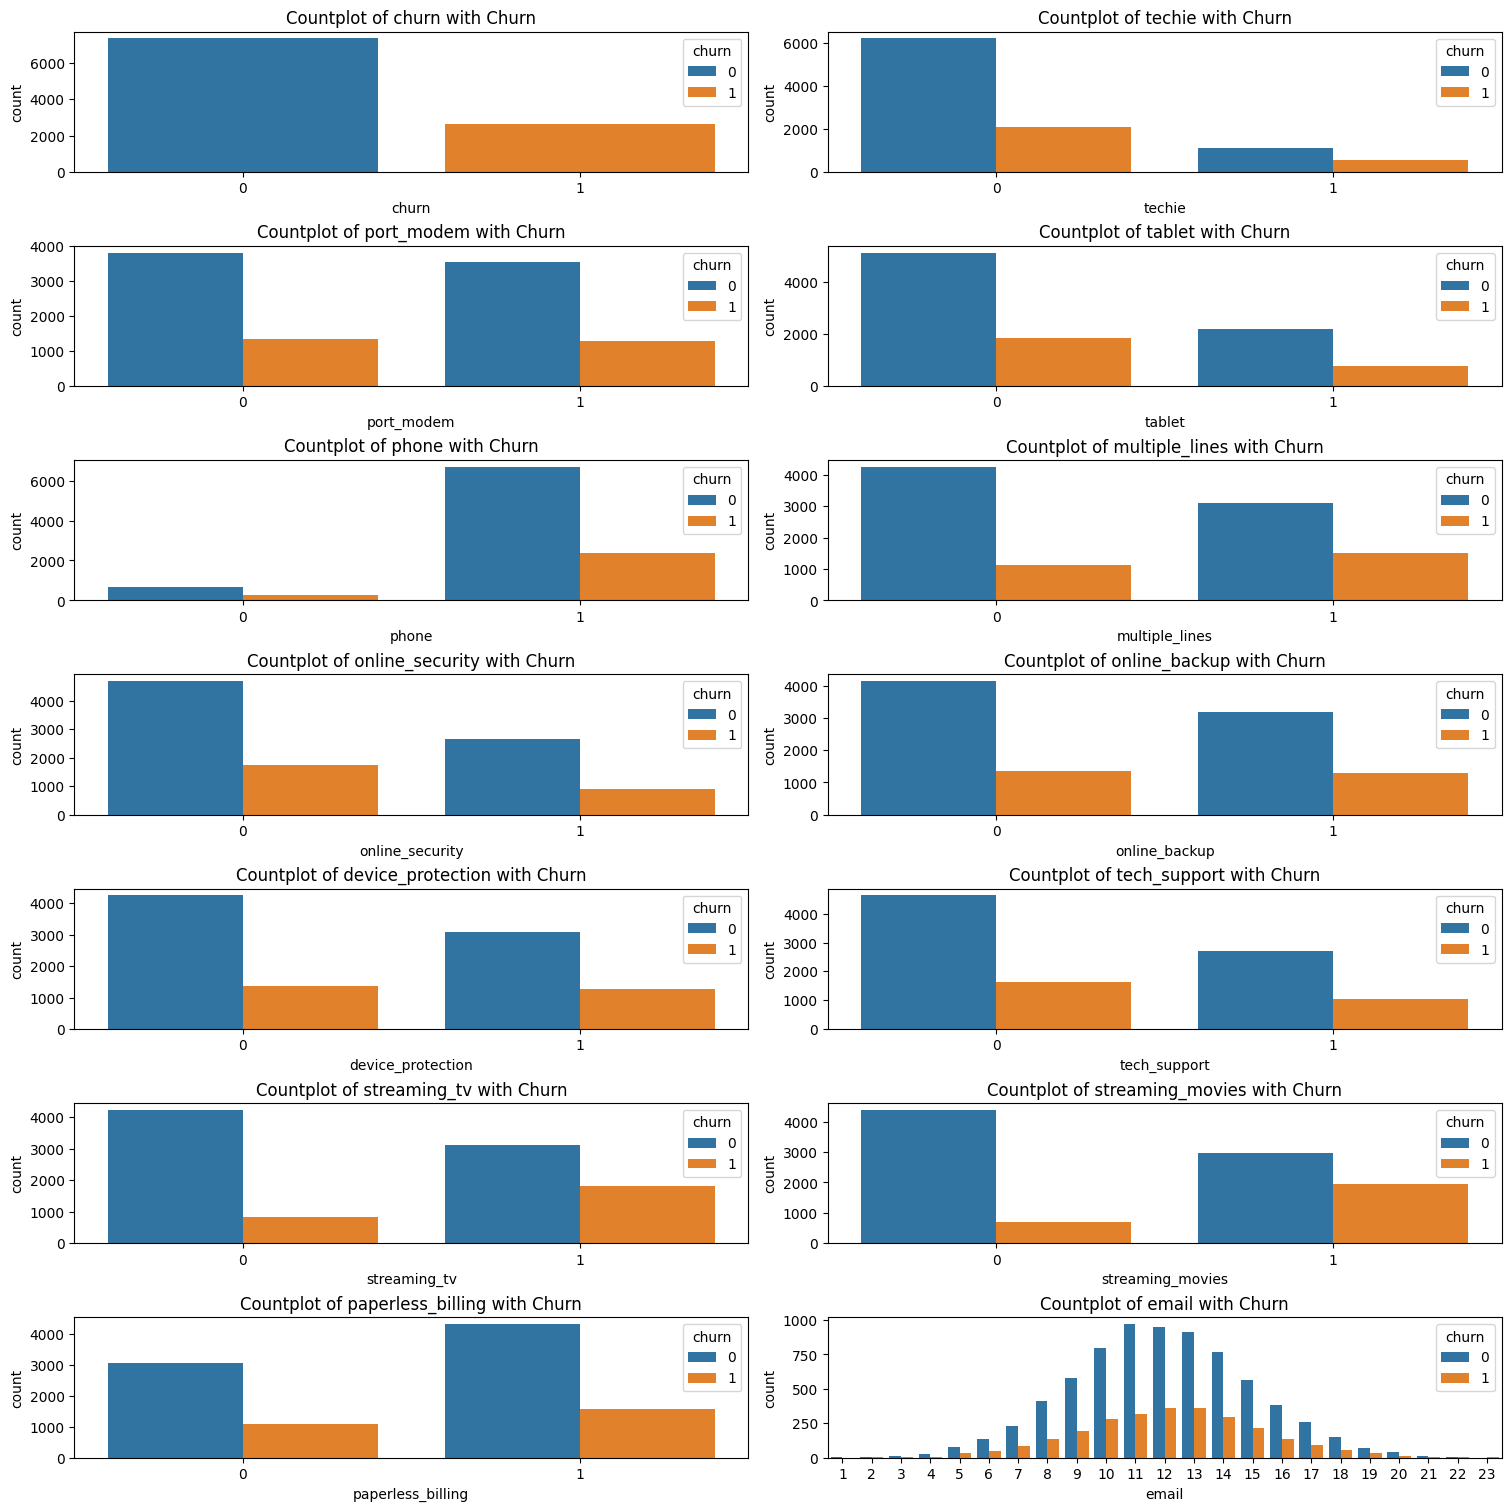

In [ ]:
# Bivariate visualizations
Bivar = ['churn','techie','port_modem', 'tablet', 'phone', 'multiple_lines',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'paperless_billing','email']

# Bivariate countplot using churn as the dependent variable
fig, axes = plt.subplots(7, 2, figsize=(15, 15), constrained_layout=True)

for col, ax in zip(Bivar, axes.flat):
    sns.countplot(x=df[col], hue=df['churn'], ax=ax)
    ax.set_title(f'Countplot of {col} with Churn')

In [ ]:
df.to_csv("churn_clean_task2.csv")

#initial model

In [ ]:
model_var = ['techie','port_modem',
             'tablet','phone','multiple_lines',
             'online_security','online_backup','device_protection',
            'tech_support','streaming_tv','streaming_movies',
             'paperless_billing','internet_service_DSL',
             'internet_service_Fiber Optic','email','contract_One year']

# Defining variables
X = df[model_var].assign(const=1)
y = df['churn']

logistic_model = sm.Logit(y, X)
result = logistic_model.fit()

# Get summary of the logistic regression model
result.summary()

Optimization terminated successfully.
         Current function value: 0.468954
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9983
Method:                           MLE   Df Model:                           16
Date:                Tue, 03 Sep 2024   Pseudo R-squ.:                  0.1890
Time:                        23:04:28   Log-Likelihood:                -4689.5
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
techie                           0.4977      0.066      7.565      0.000       0.369       0.627
port_modem                       0.0388      0.051      0.758      0.449      -0.061       0.139
tablet                          -0.0386      0.056     -0.691      0.490      -0.148       0.071
phone                           -0.1670      0.086     -1.949      0.051      -0.335       0.001
multiple_lines                   0.7521      0.052     14.550      0.000       0.651       0.853
online_security                 -0.1191      0.054     -2.220      0.026      -0.224      -0.014
online_backup                    0.2998      0.051      5.844      0.000       0.199       0.400
device_protection                0.2903      0.051      5.655      0.000       0.190       0.391
tech_support                     0.1400      0.053      2.660      0.008       0.037       0.243
streaming_tv                     1.3271      0.054     24.781      0.000       1.222       1.432
streaming_movies                 1.6176      0.055     29.587      0.000       1.510       1.725
paperless_billing                0.0515      0.052      0.991      0.322      -0.050       0.153
internet_service_DSL             0.5302      0.071      7.497      0.000       0.392       0.669
internet_service_Fiber Optic    -0.0158      0.070     -0.227      0.820      -0.152       0.121
email                            0.0104      0.008      1.225      0.221      -0.006       0.027
contract_One year               -1.1702      0.074    -15.905      0.000      -1.314      -1.026
const                           -3.4265      0.168    -20.416      0.000      -3.755      -3.098
================================================================================================
"""


###Justification of Model Reduction

To refine and optimize the model, I propose using a statistically based feature selection procedure—specifically, backward selection with an adjusted alpha level of 0.15. This approach is well-suited for the task at hand, particularly because we want to ensure that even variables with slightly higher p-values, such as the continuous variable 'email,' are considered for inclusion in the final model, in accordance with project requirements.

**Backward Selection Process:**

- **Rationale**: Backward selection involves starting with all potential predictor variables and sequentially removing the least significant variables (those with the highest p-values) one at a time, until only statistically significant variables remain in the model. This method is particularly beneficial when dealing with models that contain several variables with varying levels of significance.

- **Advantages**:

 - Generalization: By removing non-significant variables, the model becomes more generalized, which enhances its performance on unseen datasets and reduces the risk of overfitting.

 - Multicollinearity: Backward selection can also help address multicollinearity, as removing variables with high p-values may reduce the correlation between the remaining variables.

 - Interpretability: A reduced model is often easier to interpret, making it clearer which variables have the most significant impact on customer churn.

**Application in This Analysis:**

- Given the results of the initial model, variables with p-values higher than the adjusted alpha of 0.15 will be considered for removal. The process will be conducted iteratively, removing one variable at a time based on the highest p-value, rather than all at once. This careful approach ensures that variables which may contribute to the model's interpretability or have a combined effect with other variables are not prematurely excluded.

- **Specific Variables**: In this initial model, variables such as 'internet_service_Fiber Optic' and 'tablet,' which have high p-values (0.820 and 0.490, respectively), would be strong candidates for removal. However, before making final decisions, the backward selection process will be applied to confirm which variables truly do not contribute significantly to the model.

Backward selection with an adjusted alpha level will help refine the logistic regression model by focusing on the most statistically significant predictors of customer churn. This method enhances the model's robustness and interpretability, making it better suited for practical applications in predicting and mitigating customer churn.


In [ ]:
# Using backward elimination highest p-value above 0.15 (Eliminated internet_service_Fiber Optic)
model_var = ['techie','port_modem',
             'tablet','phone','multiple_lines',
             'online_security','online_backup','device_protection',
            'tech_support','streaming_tv','streaming_movies',
             'paperless_billing','internet_service_DSL','email']

# Defining variables
X = df[model_var].assign(const=1)
y = df['churn']

logistic_model = sm.Logit(y, X)
result = logistic_model.fit()

# Get summary of the logistic regression model
result.summary()

Optimization terminated successfully.
         Current function value: 0.483566
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9985
Method:                           MLE   Df Model:                           14
Date:                Tue, 03 Sep 2024   Pseudo R-squ.:                  0.1637
Time:                        23:04:28   Log-Likelihood:                -4835.7
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
techie                   0.4692      0.065      7.254      0.000       0.342       0.596
port_modem               0.0461      0.050      0.916      0.360      -0.053       0.145
tablet                  -0.0504      0.055     -0.917      0.359      -0.158       0.057
phone                   -0.1905      0.084     -2.268      0.023      -0.355      -0.026
multiple_lines           0.7095      0.051     14.005      0.000       0.610       0.809
online_security         -0.1038      0.053     -1.970      0.049      -0.207      -0.001
online_backup            0.2888      0.050      5.728      0.000       0.190       0.388
device_protection        0.2748      0.050      5.447      0.000       0.176       0.374
tech_support             0.1311      0.052      2.532      0.011       0.030       0.233
streaming_tv             1.2602      0.052     24.097      0.000       1.158       1.363
streaming_movies         1.5603      0.053     29.200      0.000       1.456       1.665
paperless_billing        0.0634      0.051      1.240      0.215      -0.037       0.164
internet_service_DSL     0.5128      0.052      9.885      0.000       0.411       0.615
email                    0.0118      0.008      1.418      0.156      -0.005       0.028
const                   -3.5240      0.158    -22.294      0.000      -3.834      -3.214
========================================================================================
"""

In [ ]:
# Using backward elimination highest p-value above 0.15 (Eliminated port_modem)
model_var = ['techie',
             'tablet','phone','multiple_lines',
             'online_security','online_backup','device_protection',
            'tech_support','streaming_tv','streaming_movies',
             'paperless_billing','internet_service_DSL','email','contract_One year']

# Defining variables
X = df[model_var].assign(const=1)
y = df['churn']

logistic_model = sm.Logit(y, X)
model_result = logistic_model.fit()

# Get summary of the logistic regression model
model_result.summary()

Optimization terminated successfully.
         Current function value: 0.468985
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9985
Method:                           MLE   Df Model:                           14
Date:                Tue, 03 Sep 2024   Pseudo R-squ.:                  0.1889
Time:                        23:04:29   Log-Likelihood:                -4689.9
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
techie                   0.4969      0.066      7.554      0.000       0.368       0.626
tablet                  -0.0389      0.056     -0.696      0.486      -0.148       0.071
phone                   -0.1669      0.086     -1.948      0.051      -0.335       0.001
multiple_lines           0.7516      0.052     14.543      0.000       0.650       0.853
online_security         -0.1194      0.054     -2.226      0.026      -0.224      -0.014
online_backup            0.3000      0.051      5.849      0.000       0.199       0.400
device_protection        0.2904      0.051      5.656      0.000       0.190       0.391
tech_support             0.1407      0.053      2.673      0.008       0.038       0.244
streaming_tv             1.3269      0.054     24.780      0.000       1.222       1.432
streaming_movies         1.6177      0.055     29.589      0.000       1.511       1.725
paperless_billing        0.0519      0.052      0.998      0.318      -0.050       0.154
internet_service_DSL     0.5408      0.053     10.227      0.000       0.437       0.644
email                    0.0105      0.008      1.245      0.213      -0.006       0.027
contract_One year       -1.1705      0.074    -15.910      0.000      -1.315      -1.026
const                   -3.4203      0.159    -21.461      0.000      -3.733      -3.108
========================================================================================
"""

In [ ]:
# Using backward elimination highest p-value above 0.15 (Eliminated tablet)
model_var = ['techie',
             'phone','multiple_lines',
             'online_security','online_backup','device_protection',
            'tech_support','streaming_tv','streaming_movies',
             'paperless_billing','internet_service_DSL','email','contract_One year']

# Defining variables
X = df[model_var].assign(const=1)
y = df['churn']

logistic_model = sm.Logit(y, X)
model_result = logistic_model.fit()

# Get summary of the logistic regression model
model_result.summary()

Optimization terminated successfully.
         Current function value: 0.469010
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9986
Method:                           MLE   Df Model:                           13
Date:                Tue, 03 Sep 2024   Pseudo R-squ.:                  0.1889
Time:                        23:04:29   Log-Likelihood:                -4690.1
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
techie                   0.4967      0.066      7.552      0.000       0.368       0.626
phone                   -0.1681      0.086     -1.963      0.050      -0.336      -0.000
multiple_lines           0.7521      0.052     14.556      0.000       0.651       0.853
online_security         -0.1196      0.054     -2.229      0.026      -0.225      -0.014
online_backup            0.3001      0.051      5.852      0.000       0.200       0.401
device_protection        0.2906      0.051      5.660      0.000       0.190       0.391
tech_support             0.1410      0.053      2.679      0.007       0.038       0.244
streaming_tv             1.3265      0.054     24.774      0.000       1.222       1.431
streaming_movies         1.6169      0.055     29.583      0.000       1.510       1.724
paperless_billing        0.0512      0.052      0.984      0.325      -0.051       0.153
internet_service_DSL     0.5409      0.053     10.230      0.000       0.437       0.645
email                    0.0106      0.008      1.252      0.210      -0.006       0.027
contract_One year       -1.1710      0.074    -15.919      0.000      -1.315      -1.027
const                   -3.4309      0.159    -21.621      0.000      -3.742      -3.120
========================================================================================
"""

In [ ]:
# Using backward elimination highest p-value above 0.15 (Eliminated paperless_billing)
model_var = ['techie',
             'phone','multiple_lines',
             'online_security','online_backup','device_protection',
            'tech_support','streaming_tv','streaming_movies',
            'internet_service_DSL','email','contract_One year']

# Defining variables
X = df[model_var].assign(const=1)
y = df['churn']

logistic_model = sm.Logit(y, X)
model_result = logistic_model.fit()

# Get summary of the logistic regression model
model_result.summary()

Optimization terminated successfully.
         Current function value: 0.469058
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9987
Method:                           MLE   Df Model:                           12
Date:                Tue, 03 Sep 2024   Pseudo R-squ.:                  0.1888
Time:                        23:04:29   Log-Likelihood:                -4690.6
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
techie                   0.4969      0.066      7.556      0.000       0.368       0.626
phone                   -0.1690      0.086     -1.974      0.048      -0.337      -0.001
multiple_lines           0.7516      0.052     14.549      0.000       0.650       0.853
online_security         -0.1196      0.054     -2.230      0.026      -0.225      -0.015
online_backup            0.3007      0.051      5.864      0.000       0.200       0.401
device_protection        0.2911      0.051      5.671      0.000       0.190       0.392
tech_support             0.1411      0.053      2.682      0.007       0.038       0.244
streaming_tv             1.3256      0.054     24.764      0.000       1.221       1.430
streaming_movies         1.6169      0.055     29.583      0.000       1.510       1.724
internet_service_DSL     0.5398      0.053     10.211      0.000       0.436       0.643
email                    0.0105      0.008      1.237      0.216      -0.006       0.027
contract_One year       -1.1717      0.074    -15.932      0.000      -1.316      -1.028
const                   -3.3975      0.155    -21.933      0.000      -3.701      -3.094
========================================================================================
"""

#reduced model

In [ ]:
# Using backward elimination highest p-value above 0.15 (Eliminated email)
model_var = ['techie',
             'phone','multiple_lines',
             'online_security','online_backup','device_protection',
            'tech_support','streaming_tv','streaming_movies',
            'internet_service_DSL','contract_One year']

# Defining variables
X = df[model_var].assign(const=1)
y = df['churn']

logistic_model = sm.Logit(y, X)
model_result = logistic_model.fit()

# Get summary of the logistic regression model
model_result.summary()

Optimization terminated successfully.
         Current function value: 0.469135
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9988
Method:                           MLE   Df Model:                           11
Date:                Tue, 03 Sep 2024   Pseudo R-squ.:                  0.1887
Time:                        23:04:29   Log-Likelihood:                -4691.3
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
techie                   0.4953      0.066      7.535      0.000       0.366       0.624
phone                   -0.1691      0.086     -1.974      0.048      -0.337      -0.001
multiple_lines           0.7515      0.052     14.547      0.000       0.650       0.853
online_security         -0.1211      0.054     -2.259      0.024      -0.226      -0.016
online_backup            0.2996      0.051      5.844      0.000       0.199       0.400
device_protection        0.2909      0.051      5.668      0.000       0.190       0.391
tech_support             0.1422      0.053      2.703      0.007       0.039       0.245
streaming_tv             1.3254      0.054     24.764      0.000       1.221       1.430
streaming_movies         1.6167      0.055     29.582      0.000       1.510       1.724
internet_service_DSL     0.5390      0.053     10.198      0.000       0.435       0.643
contract_One year       -1.1724      0.074    -15.945      0.000      -1.317      -1.028
const                   -3.2697      0.115    -28.446      0.000      -3.495      -3.044
========================================================================================
"""

#coefficients

In [ ]:
model_result.params

,0
techie,0.495252
phone,-0.169093
multiple_lines,0.751470
online_security,-0.121113
online_backup,0.299592
device_protection,0.290899
tech_support,0.142210
streaming_tv,1.325436
streaming_movies,1.616708
internet_service_DSL,0.538999


#Model Comparison

The initial logistic regression model included 16 independent variables identified during the exploratory data analysis (EDA) phase. The goal was to assess how these variables collectively contribute to predicting customer churn.

- Model Fit and Performance:

 - Pseudo R-squared: The pseudo R-squared value was 0.1890, indicating that approximately 18.90% of the variance in customer churn was explained by the model. While this value suggests a moderate fit, it also indicated that there might be some non-significant variables that could be removed to simplify the model without compromising its predictive power.

 - Significance of Variables: Several variables had high p-values (e.g., internet_service_Fiber Optic, port_modem, tablet, paperless_billing,email), suggesting that they were not significant predictors of churn.

**Model Reduction via Backward Selection**

To improve the model's interpretability and focus on the most significant predictors, backward selection was employed. This involved systematically removing the least significant variables one by one based on their p-values, starting with the highest, until only statistically significant predictors remained.

- Steps and Results:

 - Removed internet_service_Fiber Optic (p = 0.820): No change in pseudo R-squared.

 - Removed port_modem (p = 0.449): The model's performance remained stable.

 - Removed tablet (p = 0.490): The model's explanatory power was unchanged.

 - Removed paperless_billing (p = 0.322): The model's explanatory power dropped to 0.1888.

 - Removed Email (p = 0.221): Model r-squared value went to 0.1887

- Final Model:

 - The reduced model retained the most significant variables: techie, phone, multiple_lines, online_security, online_backup, device_protection, tech_support, streaming_tv, streaming_movies, internet_service_DSL, and contract_One year.

 - The pseudo R-squared of the reduced model was 0.1887, slightly lower than the initial model but still indicative of a moderate fit. The reduction process ensured that only variables with a meaningful contribution to the prediction of churn were included.

**Comparison of Initial and Reduced Models**

- Model Complexity:

 - The initial model was more complex, with 16 variables, some of which were not statistically significant. This complexity could lead to overfitting, where the model might perform well on the training data but poorly on unseen data.

 - The reduced model, with fewer variables, is simpler and more interpretable, focusing on the most important predictors of churn.

- Model Performance:

 - Despite the reduction in the number of predictors, the performance of the reduced model was almost identical to the initial model, as indicated by the very slight decrease in pseudo R-squared. This suggests that the removed variables were not critical for predicting churn, and their exclusion did not significantly impact the model's predictive power.

**Model Evaluation Metric: Pseudo R-squared**

The pseudo R-squared value is a common metric used to evaluate the fit of a logistic regression model. It represents the proportion of variance in the dependent variable (churn) that is explained by the model. While not directly comparable to the R-squared value in linear regression, it serves as a useful measure for assessing model performance in logistic regression. By incorporating a confusion matrix and calculating the accuracy of the reduced logistic regression model, you gain a better understanding of the model's performance in predicting customer churn. These metrics provide insights into not only how accurate the model is overall but also how it performs in distinguishing between churners and non-churners. This information is crucial for assessing the effectiveness of the model in practical applications.


In [ ]:
# Define the initial model
initial_model_var = ['techie','port_modem', 'tablet','phone','multiple_lines',
                     'online_security','online_backup','device_protection',
                     'tech_support','streaming_tv','streaming_movies',
                     'paperless_billing','internet_service_DSL',
                     'internet_service_Fiber Optic','email','contract_One year']

# Initial model
X_initial = df[initial_model_var].assign(const=1)
y = df['churn']

initial_model = sm.Logit(y, X_initial)
initial_result = initial_model.fit()

# Reduced model (after backward selection)
reduced_model_var = ['techie','phone','multiple_lines','online_security',
                     'online_backup','device_protection','tech_support',
                     'streaming_tv','streaming_movies','internet_service_DSL','contract_One year']

X_reduced = df[reduced_model_var].assign(const=1)
reduced_model = sm.Logit(y, X_reduced)
reduced_result = reduced_model.fit()

# Print the pseudo R-squared for both models
print("Initial Model Pseudo R-squared:", initial_result.prsquared)
print("Reduced Model Pseudo R-squared:", reduced_result.prsquared)

Optimization terminated successfully.
         Current function value: 0.468954
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.469135
         Iterations 6
Initial Model Pseudo R-squared: 0.1889721920789682
Reduced Model Pseudo R-squared: 0.18865993857483243


#E2

In [ ]:
#Odds Ratio

# Coefficients
coefficients = {
    'techie': 0.495252,
    'phone': -0.169093,
    'multiple_lines': 0.751470,
    'online_security': -0.121113,
    'online_backup': 0.299592,
    'device_protection': 0.290899,
    'tech_support': 0.142210,
    'streaming_tv': 1.325436,
    'streaming_movies': 1.616708,
    'internet_service_DSL': 0.538999,
    'contract_One year': -1.172434,
    'const': -3.269741}

def print_odds_ratio(coefficients):
    for feature, coef in coefficients.items():
        odds_ratio = np.exp(coef)
        print(f'Odds Ratio for {feature}: {odds_ratio:.4f}\n')

# Call the function
print_odds_ratio(coefficients)

Odds Ratio for techie: 1.6409

Odds Ratio for phone: 0.8444

Odds Ratio for multiple_lines: 2.1201

Odds Ratio for online_security: 0.8859

Odds Ratio for online_backup: 1.3493

Odds Ratio for device_protection: 1.3376

Odds Ratio for tech_support: 1.1528

Odds Ratio for streaming_tv: 3.7638

Odds Ratio for streaming_movies: 5.0365

Odds Ratio for internet_service_DSL: 1.7143

Odds Ratio for contract_One year: 0.3096

Odds Ratio for const: 0.0380



In [ ]:
# Predict probabilities
y_pred_prob = reduced_result.predict(X_reduced)

# Convert probabilities to binary outcomes (0 or 1) with a threshold of 0.5
y_pred = np.where(y_pred_prob >= 0.5, 1, 0)

# Confusion Matrix
conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Accuracy Calculation
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy of the reduced logistic regression model: {accuracy:.4f}")


Confusion Matrix:
[[6767  583]
 [1718  932]]
Accuracy of the reduced logistic regression model: 0.7699



### RESULTS

The final reduced logistic regression model can be expressed as the following regression equation:

logit(P(churn))=B0​+B1​(techie)+B2​(phone)+B3​(multiple_lines)+B4​(online_security)+B5​(online_backup)+B6(device_protection)+B7​(tech_support)+B8​(streaming_tv)+B9​(streaming_movies)+B10​(internet_service_DSL)+B11(contract_One year)

Where:

- B0​ is the intercept of the model.

- B1​ to B11 are the coefficients for each predictor variable.

**Interpretation of the Coefficients of the Reduced Model**

Each coefficient in the logistic regression model represents the change in the log odds of the dependent variable (churn) for a one-unit change in the predictor variable, holding all other variables constant.

- Techie (B1​): A positive coefficient indicates that customers who consider themselves tech-savvy are more likely to churn compared to those who do not.

- Phone (B2​): A negative coefficient suggests that customers who use the phone service are less likely to churn.

- Multiple Lines (B3​): A positive coefficient indicates that customers with multiple lines are more likely to churn.

- Online Security (B4​): A negative coefficient suggests that customers who subscribe to online security services are less likely to churn.

- Online Backup (B5​): A positive coefficient implies that customers who use online backup services are more likely to churn.

- Device Protection (B6​): A positive coefficient indicates a higher likelihood of churn among customers with device protection services.

- Tech Support (B7​): A positive coefficient suggests that customers who use tech support are more likely to churn.

- Streaming TV (B8​): A positive coefficient indicates that customers who use streaming TV services are more likely to churn.

- Streaming Movies (B9​): A positive coefficient indicates a higher likelihood of churn among customers who use streaming movie services.

- Internet Service DSL (B10​): A positive coefficient suggests that customers using DSL internet service are more likely to churn compared to those using other types of internet service.

- Contract: One Year (B11): The negative coefficient indicates that customers with a one-year contract are significantly less likely to churn.

**Statistical and Practical Significance of the Reduced Model**

- **Statistical Significance**: The reduced model retained only those variables that were statistically significant at the adjusted alpha level. The model’s pseudo R-squared was 0.1887, only slightly lower than the initial model, indicating that the reduced set of variables still explains a reasonable proportion of the variance in churn. The statistical significance of the model as a whole was confirmed by the overall p-value, which was 0.000, suggesting the model is meaningful and unlikely to have occurred by chance.

- **Practical Significance**: The reduced model provides actionable insights into the factors driving customer churn. For instance, the positive coefficient for multiple_lines suggests that customers with multiple lines are more likely to churn, which could prompt the company to investigate whether these customers are dissatisfied with the pricing or service. Conversely, the negative coefficient for online_security indicates that offering enhanced security services might be a strategy to reduce churn. The model’s simplicity, achieved by focusing on the most impactful variables, also makes it more interpretable and easier to implement in practical retention strategies.

**Limitations of the Data Analysis**

1. Model Fit (Pseudo R-squared): While the pseudo R-squared value of 0.1887 indicates that the model explains some variance in the churn variable, a significant portion of the variance remains unexplained. This suggests that other factors, not included in the model, might also play a crucial role in customer churn.

2. Assumptions of Logistic Regression: The model assumes a linear relationship between the independent variables and the log odds of churn, independence of observations, no multicollinearity, and no omitted variable bias. If any of these assumptions are violated, the model’s coefficients may be biased or inconsistent.

3. Generalizability: The model is based on the specific dataset provided. Its generalizability to other contexts or populations may be limited, especially if the underlying customer behavior or service offerings differ from those in the dataset.

4. Potential Omitted Variables: There may be important variables not included in the dataset that could significantly impact churn, such as customer satisfaction scores, competitor actions, or external economic factors. The exclusion of such variables could limit the model's predictive power.

5. Threshold for Classification: The choice of a 0.5 threshold to classify predicted probabilities as churn or no churn may not be optimal. Different thresholds could be tested to optimize the model’s sensitivity and specificity, depending on the business context.

The reduced logistic regression model provides a streamlined and interpretable approach to predicting customer churn. By focusing on the most statistically significant predictors, the model balances simplicity with predictive power, making it a valuable tool for developing targeted retention strategies. However, the analysis is not without limitations, particularly in terms of model fit and the assumptions of logistic regression, which should be considered when applying the model in practice.



### RECOMMENDATIONS

The analysis of customer churn using the reduced logistic regression model has identified several key factors that significantly influence whether a customer is likely to churn. Based on these findings, the following course of action is recommended:

1. Targeted Retention Strategies for High-Risk Customers
- Multiple Lines and Streaming Services:
 - Insight: Customers with multiple lines and those who subscribe to streaming TV and movie services are more likely to churn.

 - Action: Develop targeted retention offers for these high-risk groups. For example, offering bundled discounts, loyalty rewards, or enhanced customer support specifically tailored to these customers could help reduce their likelihood of churning. Additionally, understanding the pain points for customers with multiple lines, such as pricing concerns or service issues, could help in crafting more effective retention strategies.

2. Enhance Online Security and Tech Support Services

- Online Security:

 - Insight: Customers who subscribe to online security services are less likely to churn.

 - Action: Promote online security services more aggressively, especially to customers who do not currently subscribe. Consider offering free trials or discounts on these services as part of a broader retention strategy. Highlight the benefits of online security in marketing campaigns to emphasize the added value these services provide.

- Tech Support:

 - Insight: While customers who use tech support are more likely to churn, this could indicate underlying dissatisfaction with service issues.

 - Action: Invest in improving the quality and responsiveness of tech support services. Providing faster resolution times, more knowledgeable support agents, and proactive follow-ups after issues are resolved could enhance customer satisfaction and reduce churn.

3. Promote and Expand One-Year Contract Offerings

- Insight: The analysis reveals that customers with a one-year contract are significantly less likely to churn. This suggests that longer-term commitments, such as a one-year contract, effectively reduce churn by fostering customer loyalty and making it less convenient for customers to switch providers.

- Enhance Marketing and Incentives for One-Year Contracts:

 - Promotional Campaigns: Develop targeted marketing campaigns that highlight the benefits of committing to a one-year contract. Emphasize the value, stability, and potential cost savings associated with longer-term contracts compared to month-to-month plans. Use testimonials and case studies that showcase customer satisfaction among those who have chosen a one-year plan.

 - Incentives for Commitment: Introduce incentives for customers who choose to switch to or renew a one-year contract. Offer discounts, loyalty rewards, or exclusive benefits (such as free premium features or upgraded services) for committing to a longer-term plan. These incentives can make the one-year contract more appealing, particularly to customers who might be considering other providers.

 - Renewal Engagement: Engage customers well before their one-year contract ends by offering early renewal bonuses, personalized retention offers, or even extensions at favorable rates. Proactive communication about the benefits of renewing early can help secure their commitment for another year before they start considering alternatives.

4. Focus on Retaining Tech-Savvy Customers

- Techie:

 - Insight: Tech-savvy customers are more likely to churn, possibly because they are more aware of competitive offerings or more sensitive to service issues.

 - Action: Offer advanced features or premium services that appeal to tech-savvy customers, such as faster internet speeds, cutting-edge technology, or early access to new features. Additionally, providing these customers with more detailed technical information and greater control over their services could increase their satisfaction and loyalty.

5. Reevaluate and Optimize Service Bundles

- Insight: The analysis suggests that certain combinations of services (e.g., multiple lines, streaming services) are linked with higher churn rates.

- Action: Reevaluate the current service bundles to ensure they provide clear value to customers. Consider creating more flexible bundles that allow customers to choose the services that best meet their needs at a competitive price. Offering customization options can help cater to diverse customer preferences, making it less likely that customers will look elsewhere.

**Final Considerations**

- Monitor and Adjust: Continuously monitor the effectiveness of these strategies by tracking churn rates and customer feedback. Adjust the approach as needed to ensure that retention efforts are meeting the desired outcomes.

- Further Research: Consider conducting additional research to explore other potential factors influencing churn, such as customer satisfaction or market competition. Integrating these insights into the model could provide an even more comprehensive understanding of churn dynamics.

By implementing these targeted strategies based on the model's findings, the company can better retain its customer base, reduce churn rates, and ultimately improve long-term profitability.
